In [1]:
!pip install pandas

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try 'pacman -S
    python-xyz', where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Arch-packaged Python package,
    create a virtual environment using 'python -m venv path/to/venv'.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip.
    
    If you wish to install a non-Arch packaged Python application,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. Make sure you have python-pipx
    installed via pacman.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detailed specification.


In [16]:
import pandas as pd

df = pd.read_csv('Customers.csv')
df = df.drop('Gender' , axis=1)
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


In [17]:
df.isnull().sum()
df.fillna(df.mean(numeric_only=True), inplace=True)
print(df.shape)
df.drop_duplicates()
print(df.shape)

(200, 4)
(200, 4)


In [18]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.to_numpy())
# df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

array([[0.        , 0.01923077, 0.        , 0.3877551 ],
       [0.00502513, 0.05769231, 0.        , 0.81632653],
       [0.01005025, 0.03846154, 0.00819672, 0.05102041],
       [0.01507538, 0.09615385, 0.00819672, 0.7755102 ],
       [0.0201005 , 0.25      , 0.01639344, 0.39795918],
       [0.02512563, 0.07692308, 0.01639344, 0.76530612],
       [0.03015075, 0.32692308, 0.02459016, 0.05102041],
       [0.03517588, 0.09615385, 0.02459016, 0.94897959],
       [0.04020101, 0.88461538, 0.03278689, 0.02040816],
       [0.04522613, 0.23076923, 0.03278689, 0.7244898 ],
       [0.05025126, 0.94230769, 0.03278689, 0.13265306],
       [0.05527638, 0.32692308, 0.03278689, 1.        ],
       [0.06030151, 0.76923077, 0.04098361, 0.14285714],
       [0.06532663, 0.11538462, 0.04098361, 0.7755102 ],
       [0.07035176, 0.36538462, 0.04098361, 0.12244898],
       [0.07537688, 0.07692308, 0.04098361, 0.79591837],
       [0.08040201, 0.32692308, 0.04918033, 0.34693878],
       [0.08542714, 0.03846154,

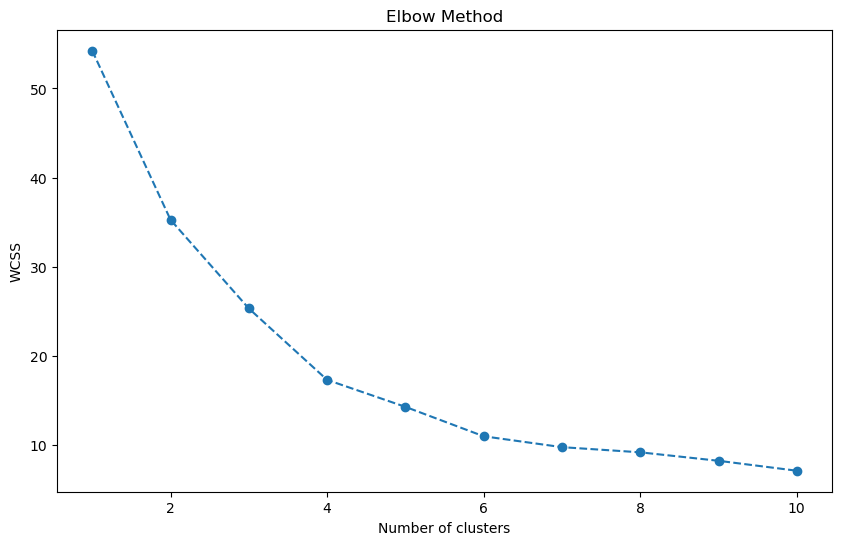

In [34]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# K-means clustering
kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(df_scaled)
kmeans_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 2, 0, 0, 0, 3, 3, 3, 3, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

Text(0.5, 1.0, 'K-means Clustering')

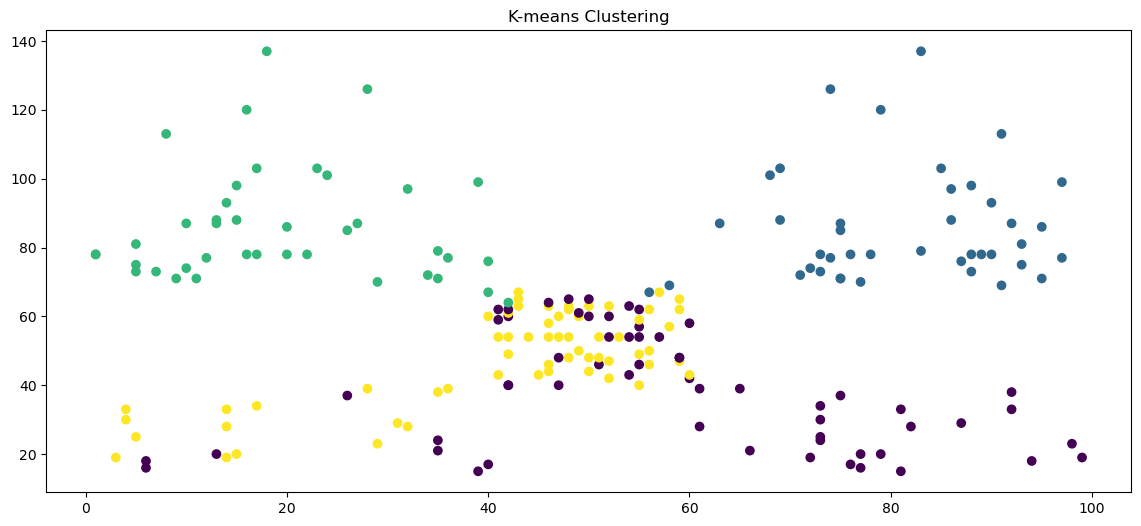

In [44]:
fig, ax1 = plt.subplots(1, 1, figsize=(14, 6))
# K-means plot
ax1.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'], c=kmeans_labels, cmap='viridis')
ax1.set_title('K-means Clustering')